# GRACE data
GRACE: https://grace.jpl.nasa.gov   
Data: https://podaac.jpl.nasa.gov/dataset/TELLUS_GRAC-GRFO_MASCON_CRI_GRID_RL06_V2

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
filename="https://podaac-opendap.jpl.nasa.gov/opendap/allData/tellus/L3/mascon/RL06/JPL/v02/CRI/netcdf/GRCTellus.JPL.200204_202101.GLO.RL06M.MSCNv02CRI.nc"

In [3]:
with xr.open_dataset(filename) as ds:
    print(ds)
    lwe=ds.lwe_thickness

<xarray.Dataset>
Dimensions:        (bounds: 2, lat: 360, lon: 720, time: 193)
Coordinates:
  * lon            (lon) float64 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
  * lat            (lat) float64 -89.75 -89.25 -88.75 ... 88.75 89.25 89.75
  * time           (time) datetime64[ns] 2002-04-17T12:00:00 ... 2021-01-16T1...
Dimensions without coordinates: bounds
Data variables:
    lat_bounds     (lat, bounds) float64 ...
    lon_bounds     (lon, bounds) float64 ...
    time_bounds    (time, bounds) datetime64[ns] ...
    lwe_thickness  (time, lat, lon) float64 ...
    uncertainty    (time, lat, lon) float64 ...
Attributes:
    Conventions:                   CF-1.6, ACDD-1.3, ISO 8601
    Metadata_Conventions:          Unidata Dataset Discovery v1.0
    standard_name_vocabulary:      NetCDF Climate and Forecast (CF) Metadata ...
    title:                         JPL GRACE and GRACE-FO MASCON RL06Mv2 CRI
    summary:                       Monthly gravity solutions from GRACE and G.

In [28]:
# Calculate monthly average
#avg_mon=lwe.groupby('time.month').mean(dim='time')
# Let's calculate climatology for each month
lwe_clim = lwe.groupby('time.month').mean(dim='time')

# Calculate anomaly
lwe_anom = lwe.groupby('time.month') - lwe_clim

Xarray indexing and selecting data   
http://xarray.pydata.org/en/stable/indexing.html

In [17]:
ds.time

<xarray.DataArray 'time' (time: 193)>
array(['2002-04-17T12:00:00.000000000', '2002-05-10T12:00:00.000000000',
       '2002-08-16T12:00:00.000000000', '2002-09-16T00:00:00.000000000',
       '2002-10-16T12:00:00.000000000', '2002-11-16T00:00:00.000000000',
       '2002-12-16T12:00:00.000000000', '2003-01-16T12:00:00.000000000',
       '2003-02-15T00:00:00.000000000', '2003-03-16T12:00:00.000000000',
       '2003-04-16T00:00:00.000000000', '2003-05-11T12:00:00.000000000',
       '2003-07-16T12:00:00.000000000', '2003-08-16T12:00:00.000000000',
       '2003-09-16T00:00:00.000000000', '2003-10-16T00:00:00.000000000',
       '2003-11-16T00:00:00.000000000', '2003-12-16T12:00:00.000000000',
       '2004-01-07T12:00:00.000000000', '2004-02-17T00:00:00.000000000',
       '2004-03-16T12:00:00.000000000', '2004-04-16T00:00:00.000000000',
       '2004-05-16T12:00:00.000000000', '2004-06-16T00:00:00.000000000',
       '2004-07-16T12:00:00.000000000', '2004-08-16T12:00:00.000000000',
       '2004-09-16T00:00:00.000000000', '2004-10-16T12:00:00.000000000',
       '2004-11-16T00:00:00.000000000', '2004-12-16T12:00:00.000000000',
       '2005-01-16T12:00:00.000000000', '2005-02-15T00:00:00.000000000',
       '2005-03-16T12:00:00.000000000', '2005-04-16T00:00:00.000000000',
       '2005-05-16T12:00:00.000000000', '2005-06-16T00:00:00.000000000',
       '2005-07-16T12:00:00.000000000', '2005-08-16T12:00:00.000000000',
       '2005-09-16T00:00:00.000000000', '2005-10-16T12:00:00.000000000',
       '2005-11-16T00:00:00.000000000', '2005-12-16T12:00:00.000000000',
       '2006-01-16T12:00:00.000000000', '2006-02-15T00:00:00.000000000',
       '2006-03-16T12:00:00.000000000', '2006-04-16T00:00:00.000000000',
       '2006-05-16T12:00:00.000000000', '2006-06-16T00:00:00.000000000',
       '2006-07-16T12:00:00.000000000', '2006-08-16T12:00:00.000000000',
       '2006-09-16T00:00:00.000000000', '2006-10-16T12:00:00.000000000',
       '2006-11-16T00:00:00.000000000', '2006-12-16T12:00:00.000000000',
       '2007-01-16T12:00:00.000000000', '2007-02-15T00:00:00.000000000',
       '2007-03-16T12:00:00.000000000', '2007-04-16T00:00:00.000000000',
       '2007-05-16T12:00:00.000000000', '2007-06-16T00:00:00.000000000',
       '2007-07-16T12:00:00.000000000', '2007-08-16T12:00:00.000000000',
       '2007-09-16T00:00:00.000000000', '2007-10-16T12:00:00.000000000',
       '2007-11-16T00:00:00.000000000', '2007-12-16T12:00:00.000000000',
       '2008-01-16T12:00:00.000000000', '2008-02-15T12:00:00.000000000',
       '2008-03-16T12:00:00.000000000', '2008-04-16T00:00:00.000000000',
       '2008-05-16T12:00:00.000000000', '2008-06-16T00:00:00.000000000',
       '2008-07-16T12:00:00.000000000', '2008-08-16T12:00:00.000000000',
       '2008-09-16T00:00:00.000000000', '2008-10-16T12:00:00.000000000',
       '2008-11-16T00:00:00.000000000', '2008-12-16T12:00:00.000000000',
       '2009-01-16T12:00:00.000000000', '2009-02-15T00:00:00.000000000',
       '2009-03-16T12:00:00.000000000', '2009-04-16T00:00:00.000000000',
       '2009-05-16T12:00:00.000000000', '2009-06-16T00:00:00.000000000',
       '2009-07-16T12:00:00.000000000', '2009-08-16T12:00:00.000000000',
       '2009-09-16T00:00:00.000000000', '2009-10-16T12:00:00.000000000',
       '2009-11-16T00:00:00.000000000', '2009-12-16T12:00:00.000000000',
       '2010-01-16T12:00:00.000000000', '2010-02-15T00:00:00.000000000',
       '2010-03-16T12:00:00.000000000', '2010-04-16T00:00:00.000000000',
       '2010-05-16T12:00:00.000000000', '2010-06-16T00:00:00.000000000',
       '2010-07-16T12:00:00.000000000', '2010-08-16T12:00:00.000000000',
       '2010-09-16T00:00:00.000000000', '2010-10-16T12:00:00.000000000',
       '2010-11-16T00:00:00.000000000', '2010-12-14T12:00:00.000000000',
       '2011-02-18T12:00:00.000000000', '2011-03-16T12:00:00.000000000',
       '2011-04-16T00:00:00.000000000', '2011-05-16T12:00:00.000000000',
       '2011-07-18T12:00:00.000000000', '2011-08-16T12:00:00.000000000',
       '2011-09-16T0

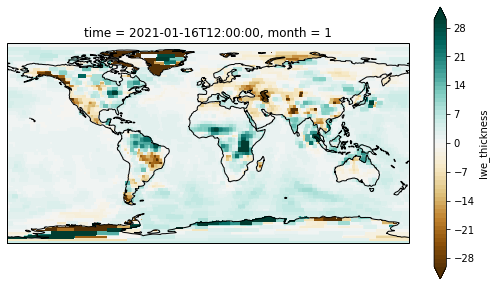

In [36]:
# Anomaly for January 2021
lev1=np.arange(-30,31,1)
proj = ccrs.PlateCarree()
cmap1=plt.cm.BrBG
fig1 = plt.figure(figsize=(9,5))
ax1 = plt.axes(projection=ccrs.PlateCarree())
lwe_anom.sel(time='2021-01-16T12:00:00.000000000').plot.contourf(ax=ax1, transform=ccrs.PlateCarree(),levels=lev1, cmap=cmap1)
ax1.coastlines()

### Exercise
Calculate and make an anomaly map for August 2012.

### Exercise
Calculate and make an anomaly map for January 2016.